In [1]:
import matplotlib.pyplot as plt
from PAMI.partialPeriodicFrequentPattern.basic.GPFgrowth import GPFgrowth
from PAMI.partialPeriodicFrequentPattern.basic.PPF_DFS import PPF_DFS
from algs.cuPPFPMiner import cuPPFPMiner
import re
import subprocess


def run_and_capture(command):
    # Run the external command
    command = " ".join(command)
    print("Running command: ", command)
    
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True, universal_newlines=True)
    
    # result.stdout will contain the output lines
    output = result.stdout
    print(output)

    patterns_found = None
    time_taken = None

    # Regex to capture number of patterns and time taken
    patterns_match = re.search(r"Number of patterns found:\s+(\d+)", output)
    time_match = re.search(r"Time taken:\s+([\d\.]+)\s+s", output)

    if patterns_match:
        patterns_found = int(patterns_match.group(1))
    if time_match:
        time_taken = float(time_match.group(1))

    return patterns_found, time_taken

raw_sep = r"\t"
sep = "\t"
output_file = "/dev/null"

In [2]:
file = "/home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv"

minSup = 5
maxPer = 5000
per_ratio = [1, 0.9999, 0.9997, 0.9995]

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []

In [3]:
for rat in per_ratio:
    miner = cuPPFPMiner(file, minSup, maxPer, rat, sep, output_file, 'managed')
    miner.mine()
    cuPPFP_native_runtime.append(miner.getRuntime())
    cuPPFP_native_pattens.append(len(miner.getPatterns()))
    

    # miner = PPF_DFS(file, minSup,
    patterns, time = run_and_capture(["./algs/ppf_dfs", file, str(minSup), str(maxPer), str(rat), raw_sep, output_file, "8"])
    PPF_DFS_runtime.append(time)
    PPF_DFS_pattens.append(patterns)

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 1 \t /dev/null 8
Number of patterns found: 27989
Time taken: 9.00928 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9999 \t /dev/null 8
Number of patterns found: 27989
Time taken: 9.53136 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9997 \t /dev/null 8
Number of patterns found: 27990
Time taken: 9.24572 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9995 \t /dev/null 8
Number of patterns found: 27991
Time taken: 8.87874 s



In [4]:
print("cuPPFP_native_runtime", cuPPFP_native_runtime)
print("cuPPFP_native_pattens", cuPPFP_native_pattens)

print("PPF_DFS_runtime", PPF_DFS_runtime)
print("PPF_DFS_pattens", PPF_DFS_pattens)

cuPPFP_native_runtime [11.156925916671753, 11.442636728286743, 11.495154619216919, 11.989448547363281]
cuPPFP_native_pattens [27989, 27989, 27990, 27991]
PPF_DFS_runtime [9.00928, 9.53136, 9.24572, 8.87874]
PPF_DFS_pattens [27989, 27989, 27990, 27991]


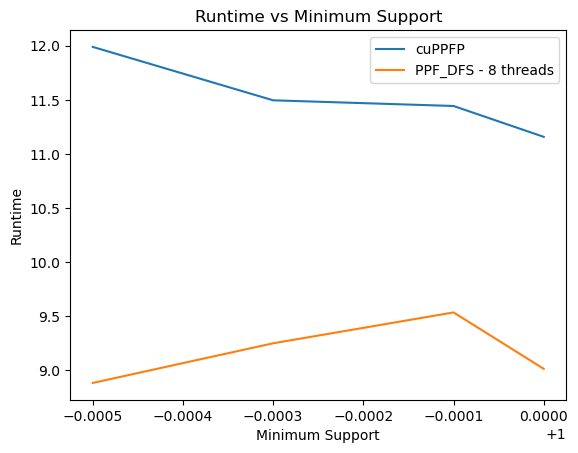

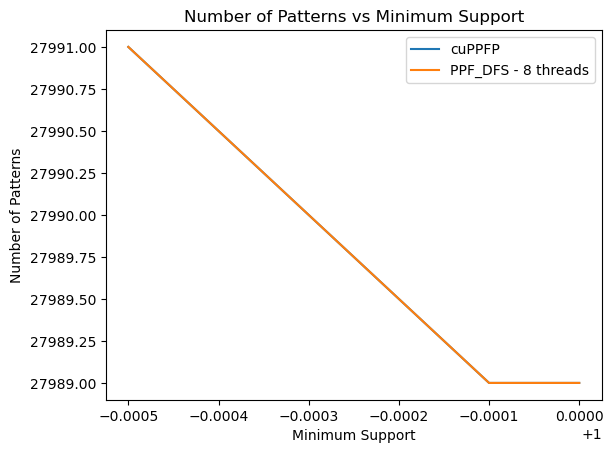

<Figure size 640x480 with 0 Axes>

In [5]:
plt.plot(per_ratio, cuPPFP_native_runtime)
# plt.plot(per_ratio, GPFgrowth_runtime)
plt.plot(per_ratio, PPF_DFS_runtime)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Runtime')
plt.title('Runtime vs Minimum Support')
plt.show()

# filename is input file + minSup + maxPer + per_ratio
plt.savefig(f"runtime_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

plt.plot(per_ratio, cuPPFP_native_pattens)
# plt.plot(per_ratio, GPFgrowth_pattens)
plt.plot(per_ratio, PPF_DFS_pattens)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Number of Patterns')
plt.title('Number of Patterns vs Minimum Support')
plt.show()

plt.savefig(f"patterns_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)


In [6]:
file = "/home/tarun/cuPAMI/datasets/Temporal_kosarak.csv"
minSup = 1500
maxPer = 5000
per_ratio = [1,0.999, 0.998, 0.997, 0.996]
sep = "\t"

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []


for rat in per_ratio:
    # miner = cuPPFPMiner(file, i, maxPer, per_ratio, sep, output_file, 'managed')
    miner = cuPPFPMiner(file, minSup, maxPer, rat, sep, output_file, 'managed')
    miner.mine()
    print("Time taken: ", miner.getRuntime(), "Number of patterns: ", len(miner.getPatterns()))
    cuPPFP_native_runtime.append(miner.getRuntime())
    cuPPFP_native_pattens.append(len(miner.getPatterns()))

    patterns, time = run_and_capture(["./algs/ppf_dfs", file, str(minSup), str(maxPer), str(rat), raw_sep, output_file, "8"])
    PPF_DFS_runtime.append(time)
    PPF_DFS_pattens.append(patterns)
    

Time taken:  2.2385103702545166 Number of patterns:  155654
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 1 \t /dev/null 8
Number of patterns found: 155655
Time taken: 75.6873 s

Time taken:  2.0941667556762695 Number of patterns:  192790
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.999 \t /dev/null 8
Number of patterns found: 192791
Time taken: 71.6596 s

Time taken:  2.2612056732177734 Number of patterns:  218799
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.998 \t /dev/null 8
Number of patterns found: 218800
Time taken: 76.5765 s

Time taken:  2.379946708679199 Number of patterns:  218811
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.997 \t /dev/null 8
Number of patterns found: 218811
Time taken: 72.7642 s

Time taken:  2.1321895122528076 Number of patterns:  218815
Running command:  ./algs/ppf_

In [8]:
print("cuPPFP_native_runtime", cuPPFP_native_runtime)
print("cuPPFP_native_pattens", cuPPFP_native_pattens)

print("PPF_DFS_runtime", PPF_DFS_runtime)
print("PPF_DFS_pattens", PPF_DFS_pattens)

cuPPFP_native_runtime [2.2385103702545166, 2.0941667556762695, 2.2612056732177734, 2.379946708679199, 2.1321895122528076]
cuPPFP_native_pattens [155654, 192790, 218799, 218811, 218815]
PPF_DFS_runtime [75.6873, 71.6596, 76.5765, 72.7642, 73.6598]
PPF_DFS_pattens [155655, 192791, 218800, 218811, 218815]


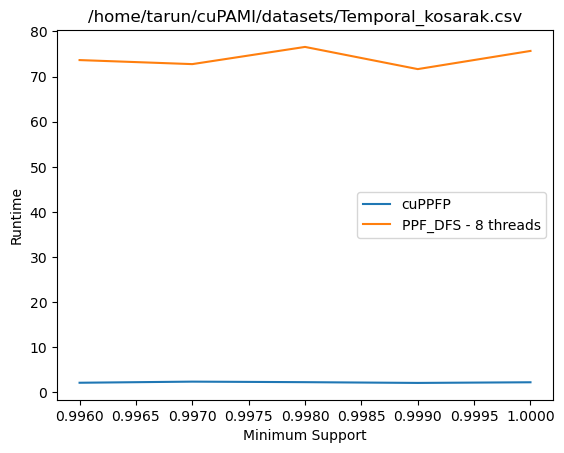

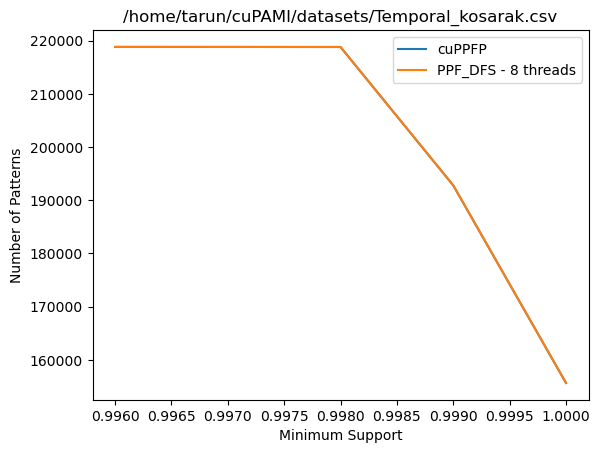

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(per_ratio, cuPPFP_native_runtime)
plt.plot(per_ratio, PPF_DFS_runtime)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Runtime')
plt.title(file)
plt.show()

plt.savefig(f"runtime_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

# plt.plot(minSup, cuPPFP_native_pattens)
# plt.plot(minSup, PPF_DFS_pattens)
plt.plot(per_ratio, cuPPFP_native_pattens)
plt.plot(per_ratio, PPF_DFS_pattens)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Number of Patterns')
plt.title(file)
plt.show()

plt.savefig(f"patterns_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

In [ ]:
file = "/home/tarun/cuPAMI/datasets/Temporal_kosarak.csv"
minSup = [900,875,850,825]
maxPer = 5000
per_ratio = 0.1
sep = "\t"

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []




Time to read file:  0.15630793571472168
Time to read file:  0.11994242668151855
Time to read file:  0.1295456886291504
Time to read file:  0.11879301071166992
Time to read file:  0.11882138252258301
Time to read file:  0.1409142017364502
Time to read file:  0.1253798007965088
Time to read file:  0.11950445175170898


In [ ]:
from algs.cuFPMiner_bit import cuFPMiner_bit
from algs.cuFPMiner_hash import cuFPMiner_hash
from algs.csv_to_parquet import csv_to_parquet
from matplotlib import pyplot as plt


work = [["/home/tarun/cuPAMI/datasets/Transactional_BMS_POS.csv", [100, 50, 25, 10]],
        ["/home/tarun/cuPAMI/datasets/Transactional_retail.csv", [100, 50, 25, 10]],
        ["/home/tarun/cuPAMI/datasets/Transactional_kosarak.csv", [100, 50, 25, 10]],
        ["/home/tarun/cuPAMI/datasets/Transactional_T10I4D100K.csv", [100, 50, 25, 10]],
        ["/home/tarun/cuPAMI/datasets/Transactional_pumsb.csv", [100, 50, 25, 10]]]


for file, minSup in work:
    cuFPMiner_bit_runtime = []
    cuFPMiner_bit_pattens = []



Not in file1
{'[  0 710] 188', '[  0 173 710 731] 176', '[  0 368] 242', '[  0 731] 185', '[ 0 53] 157', '[  0 173 731] 179', '[  0  53 368] 141', '[  0 173] 190', '[  0 710 731] 181', '[  0 173 710] 181'}
Not in file2
set()
